In [1]:
import pandas as pd
import numpy as np

# PCA

## Data Preprocessing

In [2]:
input_df = pd.read_csv("hw1_input.csv")

Normalization of the input data

In [3]:
from sklearn.preprocessing import StandardScaler

x = input_df.values
x_normalized = StandardScaler().fit_transform(x)


Control of the mean and standard deviation of normalized data

In [4]:
np.mean(x_normalized), np.std(x_normalized)

(np.float64(-3.858909780987557e-17), np.float64(1.0))

## PCA

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_normalized)
explained_variance = pca.explained_variance_ratio_

In [6]:
print('Explained variation per principal component: {}'.format(explained_variance))


Explained variation per principal component: [0.20715348 0.11070825]


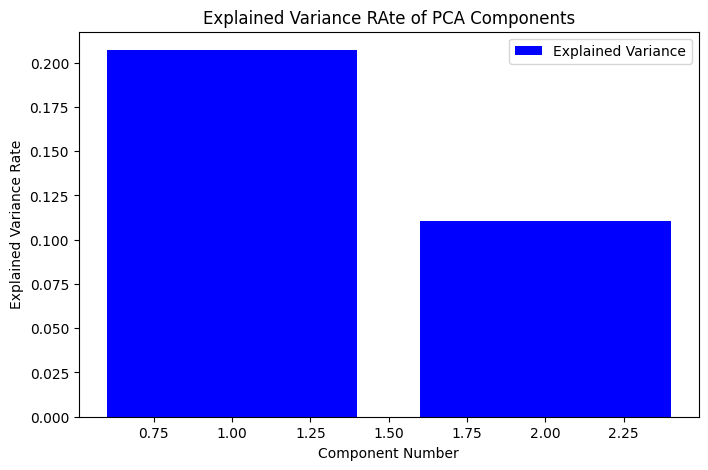

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='b', label='Explained Variance')
# plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', color='r', label='Kümülatif Açıklanan Varyans')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Rate')
plt.title('Explained Variance RAte of PCA Components')
plt.legend()
plt.show()

Variation explained by principal components is seen above and these values are so low; therefore, we will increase the component number.

In [8]:
pca_2 = PCA(n_components=11)
principalComponents_2 = pca_2.fit_transform(x_normalized)
explained_variance_2 = pca_2.explained_variance_ratio_

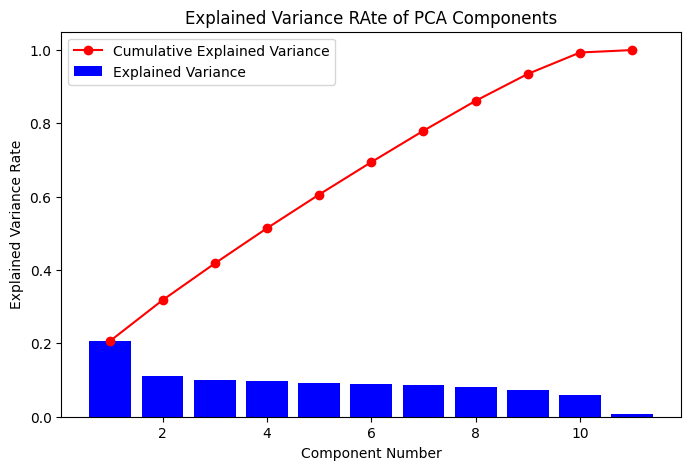

Explained variation per principal component: [0.20715348 0.31786173 0.41789557 0.51396794 0.60583873 0.69429699
 0.77995603 0.86160656 0.93500519 0.99330787 1.        ]


In [9]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_2) + 1), explained_variance_2, color='b', label='Explained Variance')
plt.plot(range(1, len(explained_variance_2) + 1), np.cumsum(explained_variance_2), marker='o', color='r', label='Cumulative Explained Variance')
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Rate')
plt.title('Explained Variance RAte of PCA Components')
plt.legend()
plt.show()
print('Explained variation per principal component: {}'.format(np.cumsum(explained_variance_2)))

The dimension of the data could not be reduced effectively by PCA because there is no component that explained variance very well. If we want to use these components, we may use first 8 components because these components explain %86 of variance.

New version of data consists of 8 components

In [10]:
pca_3 = PCA(n_components=8)
principalComponents_3 = pca_3.fit_transform(x_normalized)
explained_variance_3 = pca_3.explained_variance_ratio_

In [11]:
columns = ["PCA"+str(i) for i in range(1,9)]
pca_input_df = pd.DataFrame(data = principalComponents_3
             , columns = columns)

pca_input_df.head(5)
    

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8
0,-0.982602,1.004385,-1.516279,-2.104630,-0.546775,0.744702,-0.552818,-0.667340
1,0.248740,-0.141891,0.376193,-0.732142,-0.282065,1.368877,-0.959647,-2.041031
2,1.908395,0.083787,-0.319515,-1.120700,2.071235,-0.491458,-0.492149,-1.244033
3,-1.213149,-1.144310,-2.298673,1.459123,-1.737006,1.587619,0.433061,0.978435
4,-1.651363,0.449599,-0.306939,1.764989,0.852996,-0.355527,1.083428,0.401747


# Linear Regression

In [12]:
real_df = pd.read_csv("hw1_real.csv")
img_df = pd.read_csv("hw1_img.csv")

The main aim is to predict the magnitude; therefore, real and imaginary parts of data should be converted to magnitude as an only output.

In [20]:
magnitude_df = np.sqrt(real_df**2+img_df**2)
magnitude_df


,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.781778,0.783440,0.785795,0.788790,0.792359,0.796433,0.800936,0.805793,0.810930,0.816277,...,0.988520,0.988551,0.988581,0.988610,0.988638,0.988664,0.988690,0.988714,0.988737,0.988759
1,0.986860,0.986669,0.986470,0.986263,0.986048,0.985824,0.985592,0.985350,0.985100,0.984839,...,0.945061,0.945880,0.946669,0.947428,0.948158,0.948861,0.949537,0.950188,0.950814,0.951417
2,0.866883,0.865643,0.864258,0.862724,0.861039,0.859198,0.857199,0.855036,0.852705,0.850202,...,0.865665,0.861328,0.856551,0.851268,0.845404,0.838870,0.831564,0.823368,0.814148,0.803752
3,0.995069,0.995055,0.995041,0.995025,0.995009,0.994991,0.994973,0.994953,0.994933,0.994912,...,0.935682,0.932755,0.929637,0.926312,0.922765,0.918978,0.914932,0.910607,0.905982,0.901033
4,0.985009,0.985235,0.985447,0.985645,0.985831,0.986005,0.986169,0.986321,0.986464,0.986597,...,0.988472,0.988418,0.988361,0.988304,0.988244,0.988183,0.988121,0.988057,0.987991,0.987924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0.712967,0.703130,0.692989,0.682545,0.671797,0.660746,0.649395,0.637749,0.625814,0.613598,...,0.675654,0.683714,0.691363,0.698625,0.705520,0.712067,0.718286,0.724194,0.729808,0.735143
381,0.901571,0.894376,0.886417,0.877604,0.867842,0.857028,0.845054,0.831812,0.817200,0.801129,...,0.990712,0.990714,0.990716,0.990716,0.990715,0.990713,0.990710,0.990706,0.990701,0.990695
382,0.985925,0.986114,0.986294,0.986465,0.986629,0.986785,0.986934,0.987076,0.987212,0.987341,...,0.987993,0.987889,0.987783,0.987674,0.987561,0.987445,0.987326,0.987204,0.987078,0.986949
383,0.984282,0.984049,0.983807,0.983558,0.983300,0.983034,0.982758,0.982473,0.982179,0.981875,...,0.911483,0.913052,0.914566,0.916027,0.917439,0.918802,0.920118,0.921390,0.922618,0.923805


In [53]:
import plotly.graph_objects as go

fig = go.Figure()

input = magnitude_df.iloc[:10,:]
x_data=[int(x) for x in input.columns]

for i in range(len(input.index)):
    fig.add_trace(go.Scatter(
        x=x_data,
        y=input.iloc[i].values,
        mode='lines',
        name=str(i)
        ))

fig.update_layout(width=700,height=500)
fig.show()

As above, there are many different frequencies magnitudes are close to zero and some frequencies should be determined to make a model that indicates the importance of variables. In other words, some frequency points will be used instead of analyzing variables at all frequencies. 

In [66]:
magnitude_df.min().sort_values(ascending=True).iloc[:5]

71     0.005621
28     0.008276
27     0.010554
126    0.012866
155    0.015970
dtype: float64

The left side of the data shows which frequencies will be used for the analysis.

In [ ]:
skle